In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import signal
from matplotlib.pyplot import figure
import scipy
import copy

In [2]:
# create signal
srate = 1000 
time  = np.arange(0,3,1/srate)
n     = len(time)
p     = 15 

noiseamp = 5

ampl   = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise  = noiseamp * np.random.randn(n)
signal = ampl + noise


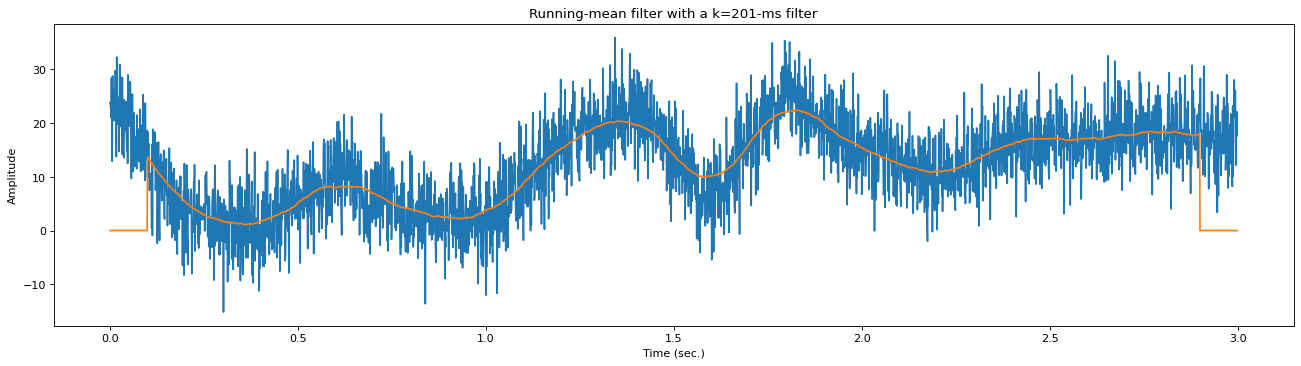

In [3]:
# smooth it
filtsig = np.zeros(n)

k = 100 
for i in range(k,n-k):
    filtsig[i] = np.mean(signal[i-k:i+k])

windowsize = 1000*(k*2+1) / srate

figure(figsize=(20, 5), dpi=80)
plt.plot(time,signal,label='orig')
plt.plot(time,filtsig,label='filtered')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()


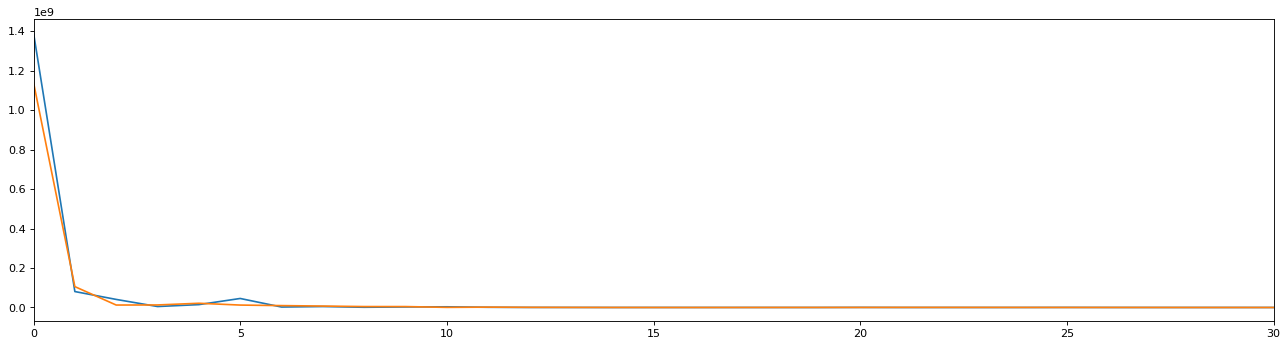

In [4]:
# Need to do fft on the graph and then ilter it to get the same result

# FFT
frequenciesSig = np.abs(scipy.fft.fft(signal))**2
frequenciesAnsw = np.abs(scipy.fft.fft(filtsig))**2

figure(figsize=(20, 5), dpi=80)
plt.plot(frequenciesSig)
plt.plot(frequenciesAnsw)
plt.xlim(0,30)
plt.show()


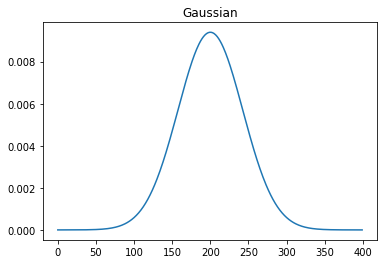

In [5]:
## create the Gaussian kernel
# full-width half-maximum: the key Gaussian parameter
fwhm = 100 # in ms

# normalized time vector in ms
k = 200
gtime = 1000*np.arange(-k,k)/srate

# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)
plt.plot(gauswin)
plt.title('Gaussian')
plt.show()

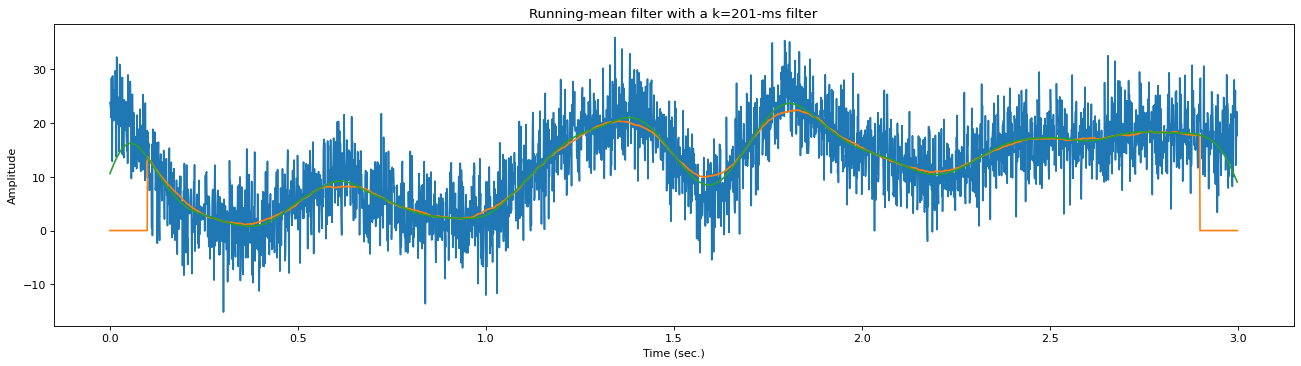

In [6]:
nConv = n + 2*k+1 - 1

frequenciesGaus = scipy.fft.fft(gauswin,nConv)
frequenciesSig = scipy.fft.fft(signal,nConv)

convres = np.real( scipy.fft.ifft( frequenciesSig*frequenciesGaus ) )
convres = convres[k:-k]

hz = np.linspace(0,srate,nConv)

figure(figsize=(20, 5), dpi=80)
plt.plot(time,signal,label='orig')
plt.plot(time,filtsig,label='filtered')
plt.plot(time, convres,label='second')

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()